In [26]:
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [3]:
load_dotenv()

True

In [4]:
api_key = os.getenv("API_KEY")
db_host = os.getenv("DB_HOST")
db_password = os.getenv("DB_PASSWORD")
db_user = os.getenv("DB_USER")
db_name = os.getenv("DB_NAME")
azure_api_key = os.getenv("OPENAI_KEY")
azure_endpoint = os.getenv("OPENAI_ENDPOINT")
azureai_name = os.getenv("OPENAI_NAME")
pinecone_api_key = os.getenv("PINECONE_API_KEY")

In [5]:
import vanna
from vanna.pinecone import PineconeDB_VectorStore
from pinecone import ServerlessSpec, Pinecone

In [6]:
from openai import AzureOpenAI
from vanna.openai import OpenAI_Chat
from vanna.remote import VannaDefault
from vanna.vannadb import VannaDB_VectorStore
from vanna.base import VannaBase

In [ ]:
#vn = VannaDefault(model=model_name, api_key=api_key)

In [7]:
index_name = 'haderach'

In [ ]:
# pc = Pinecone()

# client =pc.create_index(
#     name=index_name,
#     dimension=1024,
#     metric="cosine",
#     spec=ServerlessSpec(
#         cloud="aws",
#         region="us-east-1"
#     )
# )

In [20]:
config = {
    "dimensions": 1024,
    "distance_metric": "cosine",
    "index_name": index_name,
    "api_key": pinecone_api_key,
    "fastembed_model": "BAAI/bge-large-en-v1.5"
}


In [21]:
class MyVanna(PineconeDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        PineconeDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, client=AzureOpenAI(api_version="2024-08-01-preview",
            azure_endpoint=azure_endpoint,
            api_key=azure_api_key,
           ), config={"model": azureai_name })

In [22]:
vn = MyVanna(config=config)

In [29]:
vn.connect_to_postgres(host=db_host,
                       dbname=db_name,
                       user=db_user,
                       password=db_password,
                       port=5432)

In [36]:
# df_information_schema = vn.run_sql('''SELECT *
#                                     FROM information_schema.columns
#                                     WHERE table_schema = 'public'; ''')
df_information_schema.head()

,table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,numeric_precision,numeric_precision_radix,numeric_scale,datetime_precision,interval_type,interval_precision,character_set_catalog,character_set_schema,character_set_name,collation_catalog,collation_schema,collation_name,domain_catalog,domain_schema,domain_name,udt_catalog,udt_schema,udt_name,scope_catalog,scope_schema,scope_name,maximum_cardinality,dtd_identifier,is_self_referencing,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
0,quizzard,public,Questions,Id,1,None,NO,uuid,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,uuid,None,None,None,None,1,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
1,quizzard,public,Questions,QuestionText,2,None,YES,text,NaN,1.073742e+09,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,text,None,None,None,None,2,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
2,quizzard,public,Questions,CreatedAt,3,None,NO,timestamp with time zone,NaN,NaN,NaN,NaN,NaN,6.0,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,timestamptz,None,None,None,None,3,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
3,quizzard,public,Questions,UpdatedAt,4,None,NO,timestamp with time zone,NaN,NaN,NaN,NaN,NaN,6.0,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,timestamptz,None,None,None,None,4,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
4,quizzard,public,Questions,QuizId,5,None,NO,uuid,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,uuid,None,None,None,None,5,NO,NO,None,None,None,None,None,NO,NEVER,None,YES


In [ ]:
plan = vn.get_training_plan_generic(df_information_schema)

Train on Information Schema: quizzard.public Questions
Train on Information Schema: quizzard.public QuizSessions
Train on Information Schema: quizzard.public QuizCategories
Train on Information Schema: quizzard.public Quizzes
Train on Information Schema: quizzard.public __EFMigrationsHistory
Train on Information Schema: quizzard.public Users
Train on Information Schema: quizzard.public Options
Train on Information Schema: quizzard.public Answers

In [32]:
for table_name in plan.get_summary():
  print(table_name[len("Train on Information Schema: "):])

quizzard.public Questions
quizzard.public QuizSessions
quizzard.public QuizCategories
quizzard.public Quizzes
quizzard.public __EFMigrationsHistory
quizzard.public Users
quizzard.public Options
quizzard.public Answers


In [37]:
df_information_schema.head()

,table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,numeric_precision,numeric_precision_radix,numeric_scale,datetime_precision,interval_type,interval_precision,character_set_catalog,character_set_schema,character_set_name,collation_catalog,collation_schema,collation_name,domain_catalog,domain_schema,domain_name,udt_catalog,udt_schema,udt_name,scope_catalog,scope_schema,scope_name,maximum_cardinality,dtd_identifier,is_self_referencing,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
0,quizzard,public,Questions,Id,1,None,NO,uuid,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,uuid,None,None,None,None,1,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
1,quizzard,public,Questions,QuestionText,2,None,YES,text,NaN,1.073742e+09,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,text,None,None,None,None,2,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
2,quizzard,public,Questions,CreatedAt,3,None,NO,timestamp with time zone,NaN,NaN,NaN,NaN,NaN,6.0,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,timestamptz,None,None,None,None,3,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
3,quizzard,public,Questions,UpdatedAt,4,None,NO,timestamp with time zone,NaN,NaN,NaN,NaN,NaN,6.0,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,timestamptz,None,None,None,None,4,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
4,quizzard,public,Questions,QuizId,5,None,NO,uuid,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,quizzard,pg_catalog,uuid,None,None,None,None,5,NO,NO,None,None,None,None,None,NO,NEVER,None,YES


In [ ]:
vn.train(plan=plan)

In [ ]:
# DDL = '''
#     CREATE TABLE IF NOT EXISTS public."Answers" (
#         "Id" uuid NOT NULL DEFAULT gen_random_uuid(),
#         "CreatedAt" timestamptz NOT NULL,
#         "LastUpdatedAt" timestamptz NOT NULL,
#         "OptionId" uuid NOT NULL,
#         "QuestionId" uuid NOT NULL,
#         "QuizSessionId" uuid NOT NULL,
#         "UserId" uuid NOT NULL,
#         CONSTRAINT "Answers_pkey" PRIMARY KEY ("Id"),
#         CONSTRAINT "Answers_OptionId_fkey" FOREIGN KEY ("OptionId") 
#             REFERENCES public."Options" ("Id") ON DELETE CASCADE,
#         CONSTRAINT "Answers_QuestionId_fkey" FOREIGN KEY ("QuestionId") 
#             REFERENCES public."Questions" ("Id") ON DELETE CASCADE,
#         CONSTRAINT "Answers_QuizSessionId_fkey" FOREIGN KEY ("QuizSessionId") 
#             REFERENCES public."QuizSessions" ("Id") ON DELETE CASCADE,
#         CONSTRAINT "Answers_UserId_fkey" FOREIGN KEY ("UserId") 
#             REFERENCES public."Users" ("Id") ON DELETE CASCADE
#     );
# '''

In [24]:
DDL = '''
CREATE TABLE IF NOT EXISTS public."Answers" (
    "Id" uuid PRIMARY KEY DEFAULT gen_random_uuid(),
    "CreatedAt" timestamptz NOT NULL,
    "LastUpdatedAt" timestamptz NOT NULL,
    "OptionId" uuid NOT NULL REFERENCES public."Options" ("Id") ON DELETE CASCADE,
    "QuestionId" uuid NOT NULL REFERENCES public."Questions" ("Id") ON DELETE CASCADE,
    "QuizSessionId" uuid NOT NULL REFERENCES public."QuizSessions" ("Id") ON DELETE CASCADE,
    "UserId" uuid NOT NULL REFERENCES public."Users" ("Id") ON DELETE CASCADE
);
'''

In [25]:
vn.train(ddl=DDL)

Adding ddl: 
CREATE TABLE IF NOT EXISTS public."Answers" (
    "Id" uuid PRIMARY KEY DEFAULT gen_random_uuid(),
    "CreatedAt" timestamptz NOT NULL,
    "LastUpdatedAt" timestamptz NOT NULL,
    "OptionId" uuid NOT NULL REFERENCES public."Options" ("Id") ON DELETE CASCADE,
    "QuestionId" uuid NOT NULL REFERENCES public."Questions" ("Id") ON DELETE CASCADE,
    "QuizSessionId" uuid NOT NULL REFERENCES public."QuizSessions" ("Id") ON DELETE CASCADE,
    "UserId" uuid NOT NULL REFERENCES public."Users" ("Id") ON DELETE CASCADE
);



'353813-ddl'

In [25]:
vn.train(documentation="When querying any table, use the fully qualified table name including schema")

Adding documentation....


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/742 [00:00<?, ?B/s]

c:\Users\b-cichebi\AppData\Local\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\b-cichebi\AppData\Local\Temp\fastembed_cache\models--qdrant--bge-large-en-v1.5-onnx. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.onnx:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

'0165d96b-cb6b-54fd-bd22-88d150cdf9fa-doc'

In [27]:
sql_queries = [
    ''' SELECT 
    "QuizSessionId",
    COUNT(*) AS answers_in_session,
    MIN("CreatedAt") AS session_start,
    MAX("CreatedAt") AS session_end,
    COUNT(DISTINCT "UserId") AS unique_users
    FROM public."Answers"
    GROUP BY "QuizSessionId"
    ORDER BY session_start;
    ''',

    ''' SELECT 
    q."QuestionText",
    COUNT(a.*) AS times_answered,
    COUNT(DISTINCT a."UserId") AS unique_users_answered
    FROM public."Answers" a
    JOIN public."Questions" q ON q."Id" = a."QuestionId"
    GROUP BY a."QuestionId", q."QuestionText"
    ORDER BY times_answered DESC;
    ''',

    ''' SELECT 
    CONCAT(u."FirstName", ' ', u."LastName") AS FullName, 
    COUNT(q."Score") AS points,
    TO_CHAR(q."EndTime" - q."StartTime", 'HH24:MI:SS') AS duration
    FROM public."Users" AS u
    JOIN public."QuizSessions" AS q ON u."Id" = q."UserId"
    GROUP BY FullName, duration
    ORDER BY points DESC;
    ''',

    ''' SELECT 
    CONCAT("FirstName", ' ', "LastName") AS FullName,
    "Email"
    FROM public."Users"
    WHERE "EmailConfirmed" = true;
    '''
]

In [32]:
vn.run_sql(sql_queries[1]).head()

,QuestionText,times_answered,unique_users_answered
0,"In 2020, Microsoft announced the acquisition o...",13,10
1,Who are the co-founders of Microsoft?,11,9
2,"In programming, what is the purpose of the 'if...",10,8
3,"In object-oriented programming, what is encaps...",10,8
4,Which gaming console is produced by Microsoft?,10,9


In [11]:
vn.run_sql(sql_queries[3]).head()

,fullname,Email
0,Admin Oga,admin@admin.com
1,Christian Ichebi,christianichebi@gmail.com
2,Zee Bola,zajibola41@gmail.com
3,Odunayo Bamigboye,odunayo845@gmail.com
4,eka essien,ekaessien@gmail.com


In [11]:
vn.train(
        question="What are the most popular questions being answered, and how many unique users have answered each one?",
        sql=sql_queries[1]
)

'0d9b503a9fd7e3f2d57d1786c462003b-sql'

In [33]:
vn.train(sql=sql_queries[2])

Using model gpt-35-turbo for 132.75 tokens (approx)
Question generated with sql: What is the full name, total points, and duration of each user's quiz session, sorted by the highest number of points? 
Adding SQL...


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

'e6b70182-6f27-56ca-9391-1d3be5b38806-sql'

In [33]:
vn.train(question= "Who are the users with confirmed emails?",
         sql=sql_queries[3])

'b3a1d2b6f561005f98928c55071b2528-sql'

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

SQL Prompt: [{'role': 'system', 'content': 'You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\nCREATE TABLE IF NOT EXISTS public."Answers" (\n    "Id" uuid PRIMARY KEY DEFAULT gen_random_uuid(),\n    "CreatedAt" timestamptz NOT NULL,\n    "LastUpdatedAt" timestamptz NOT NULL,\n    "OptionId" uuid NOT NULL REFERENCES public."Options" ("Id") ON DELETE CASCADE,\n    "QuestionId" uuid NOT NULL REFERENCES public."Questions" ("Id") ON DELETE CASCADE,\n    "QuizSessionId" uuid NOT NULL REFERENCES public."QuizSessions" ("Id") ON DELETE CASCADE,\n    "UserId" uuid NOT NULL REFERENCES public."Users" ("Id") ON DELETE CASCADE\n);\n\n\n\n===Additional Context \n\nThe following columns are in the Answers table in the quizzard database:\n\n|    | table_catalog   | table_schema   | table_name   | column_name   | data_type             

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Using model gpt-35-turbo for 237.25 tokens (approx)


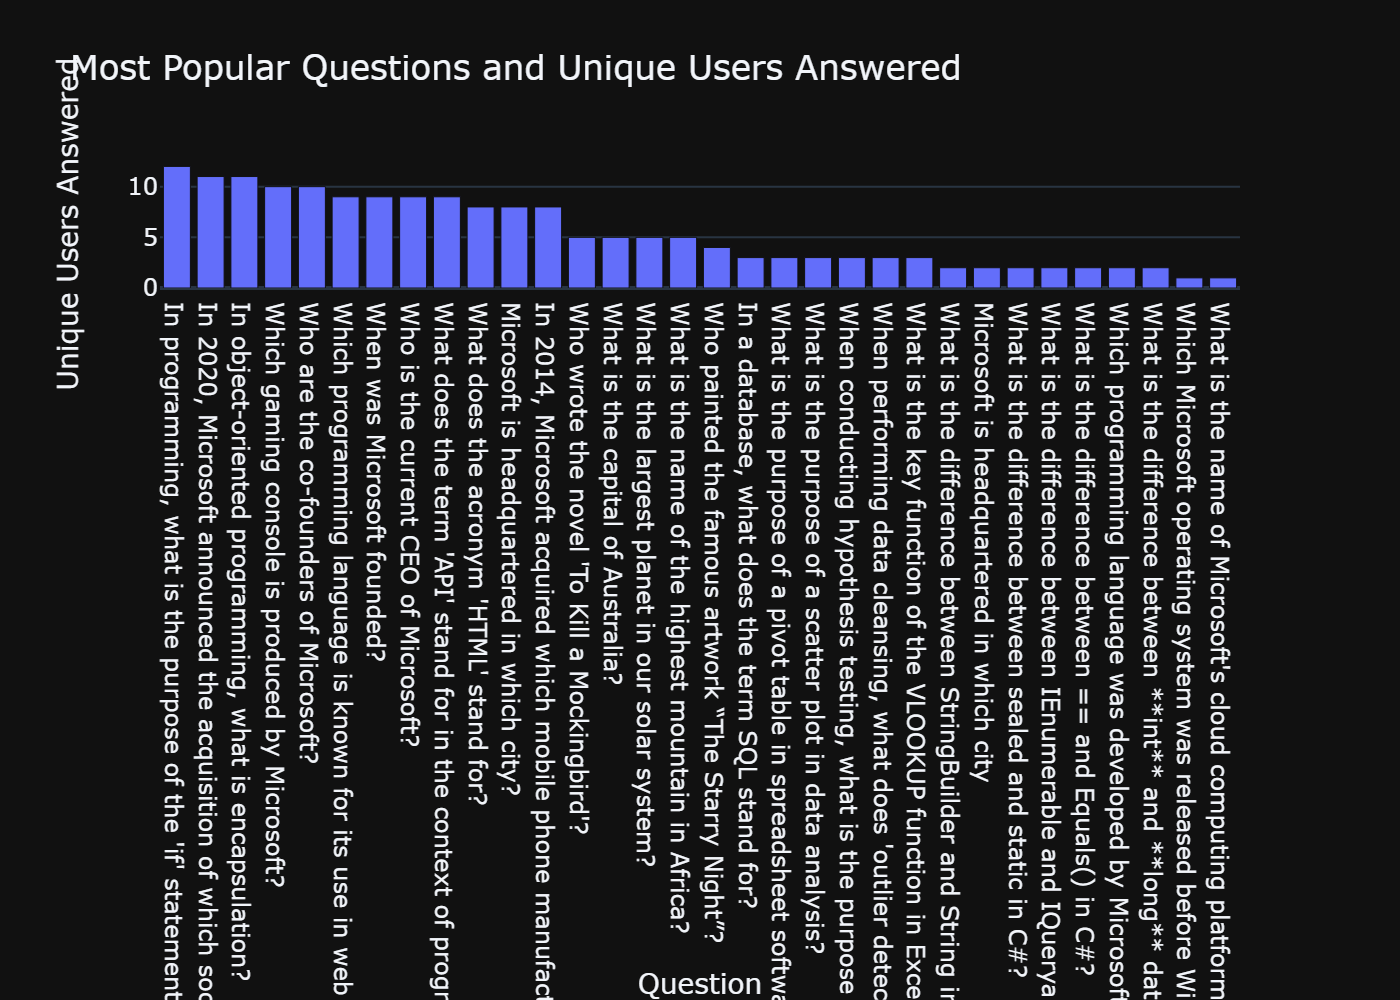

('SELECT\n    q."QuestionText",\n    COUNT(DISTINCT a."UserId") AS unique_users_answered\nFROM public."Answers" a\nJOIN public."Questions" q ON q."Id" = a."QuestionId"\nGROUP BY q."QuestionText"\nORDER BY unique_users_answered DESC;',                                          QuestionText  unique_users_answered
0   In programming, what is the purpose of the 'if...                     12
1   In 2020, Microsoft announced the acquisition o...                     11
2   In object-oriented programming, what is encaps...                     11
3      Which gaming console is produced by Microsoft?                     10
4               Who are the co-founders of Microsoft?                     10
5   Which programming language is known for its us...                      9
6                         When was Microsoft founded?                      9
7                Who is the current CEO of Microsoft?                      9
8   What does the term 'API' stand for in the cont...                   

In [35]:
answer = vn.ask(question="What are the most popular questions being answered, and how many unique users have answered each one?", allow_llm_to_see_data=True)

print(answer)

In [17]:
vn.get_training_data()

,id,training_data_type,question,content
0,2443726-doc,documentation,None,The following columns are in the __EFMigration...
1,2443723-doc,documentation,None,The following columns are in the QuizSessions ...
2,2443722-doc,documentation,None,The following columns are in the Questions tab...
3,2443736-doc,documentation,None,The following columns are in the Users table i...
4,2443729-doc,documentation,None,The following columns are in the Answers table...
5,2443732-doc,documentation,None,The following columns are in the QuizSessions ...
6,2443728-doc,documentation,None,The following columns are in the Options table...
7,353813-ddl,ddl,None,"\nCREATE TABLE IF NOT EXISTS public.""Answers"" ..."
8,2443730-doc,documentation,None,"When querying any table, use the fully qualifi..."
9,2443738-doc,documentation,None,The following columns are in the Answers table...


In [36]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Using model gpt-35-turbo for 2770.5 tokens (approx)
Using model gpt-35-turbo for 109.5 tokens (approx)


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Using model gpt-35-turbo for 2779.25 tokens (approx)


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]